In [60]:
import pandas as pd
import sqlite3
import numpy as np
from shapely.geometry import Point
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

# my custom file
#import Mapping_tools

In [137]:
# FILE PATHS -- so we can each just comment out file paths

# ALEX'S PATHS
database_db = 'blue_bikes.db'
bike_lanes_geojson = 'bos-bike-paths-2022.geojson'
boston_city_shp = "Boston Neighborhoods/Boston_Neighborhoods.shp"
#sea_levels =

# ZACK'S PATHS
database_db = '/Users/zacharyarmand/Documents/DS5110-blue-bikes/Data/blue_bikes.db'
bike_lanes_geojson = '/Users/zacharyarmand/Documents/DS5110-blue-bikes/Data/bos-bike-paths-2022.geojson'
boston_city_shp = "/Users/zacharyarmand/Documents/DS5110/Homeworks/Homework2/Boston_Neighborhoods/Boston_Neighborhoods.shp"
sea_level_9in_path = '/Users/zacharyarmand/Documents/DS5110-blue-bikes/Data/9_inch_SLR_10_pct_storm/_9inch_Sea_Level_Rise_10pct_Annual_Flood.shp'
sea_level_21in_path = '/Users/zacharyarmand/Documents/DS5110-blue-bikes/Data/21_inch_SLR_10_pct_storm/_21inch_Sea_Level_Rise__10pct_Annual_Flood.shp'
sea_level_36in_path = '/Users/zacharyarmand/Documents/DS5110-blue-bikes/Data/36_inch_SLR_10_pct_storm/_36inch_Sea_Level_Rise_10pct_Annual_Flood.shp'


In [62]:
# Connection to database:
con = sqlite3.connect(database_db)

In [63]:
# Here are all the Views:
boston_crashes_2017 = pd.read_sql("SELECT * FROM boston_crash_reports_2017", con)
boston_crashes_2022 = pd.read_sql("SELECT * FROM boston_crash_reports_2022", con)
boston_fatalities_2017 = pd.read_sql("SELECT * FROM boston_fatality_report_2017", con)
boston_fatalities_2022 = pd.read_sql("SELECT * FROM boston_fatality_report_2022", con)
bike_5001 = pd.read_sql("SELECT * FROM bike_5001", con)

# Tables:
bluebike_trips2017 = pd.read_sql("SELECT * FROM bluebike_trips2017", con)
bluebike_trips2017 = pd.read_sql("SELECT * FROM bluebike_trips2022", con)
bluebike_trips2017 = pd.read_sql("SELECT * FROM boston_crash_reports", con)
bluebike_trips2017 = pd.read_sql("SELECT * FROM boston_fatality_report", con)
bluebike_trips2017 = pd.read_sql("SELECT * FROM current_bluebikes_stations", con)

Index(['dispatch_ts', 'mode_type', 'lat', 'long', 'geometry'], dtype='object')


<Axes: >

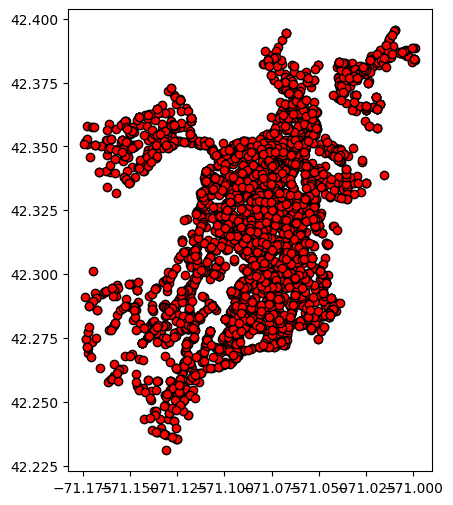

In [64]:
# Convert crime dataframe into a series of point objects
points = [Point(xy) for xy in zip(boston_crashes_2017['long'], boston_crashes_2017['lat'])]
# Convert that point layer into a geodataframe object
geodf = gpd.GeoDataFrame(boston_crashes_2017,
                             crs="EPSG:4326",
                             geometry=points)

print(geodf.columns)

# Only showing value less than 75 to remove outliers
fig, ax = plt.subplots(figsize=(7, 6))
#geodf.plot(color='#808080', edgecolor='#000000', ax=ax)  # background plot
# Plot data
geodf.plot( edgecolor='#000000',
          legend=True, categorical=False, ax=ax, color='r')

# Stuff We Like - so far? needs to be cleaned up still?

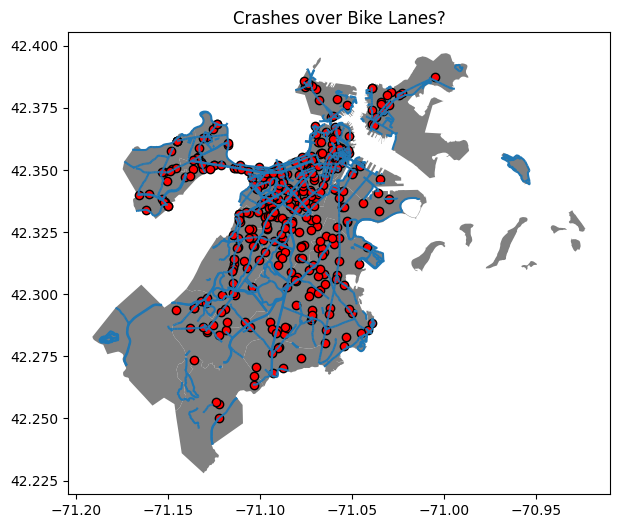

In [68]:
# Filter crash data to just bikes
bike_crashes_2017 = boston_crashes_2017[boston_crashes_2017["mode_type"] == 'bike'] 

# Mapping a dataframe with lat/long data to a point file
points = [Point(xy) for xy in zip(bike_crashes_2017['long'], bike_crashes_2017['lat'])]
# Convert that point layer into a geodataframe object
crashes_2017 = gpd.GeoDataFrame(bike_crashes_2017, crs="EPSG:4326", geometry=points)


# Read in bike lanes file
bike_lanes = gpd.read_file(bike_lanes_geojson)

# Add shapefile of Boston Neighborhoods https://data.boston.gov/dataset/boston-neighborhoods
boston_neighborhoods = gpd.read_file(boston_city_shp, type='Polygon')
boston_neighborhoods = boston_neighborhoods.to_crs('EPSG:4326')


# create figure
fig, ax = plt.subplots(figsize=(7, 7))
# Neighborhood background map
#nhoods.plot(color='#808080', edgecolor='#000000', ax=ax)  # background plot

# Plot background images
bike_lanes.plot(ax=ax)
boston_neighborhoods.plot(ax=ax, color='grey')

# Plot data
crashes_2017.plot(edgecolor='#000000', legend=True, categorical=False, ax=ax, color='r')
plt.title("Crashes over Bike Lanes?")
plt.show()

## Zack's Work In Progress Stuff

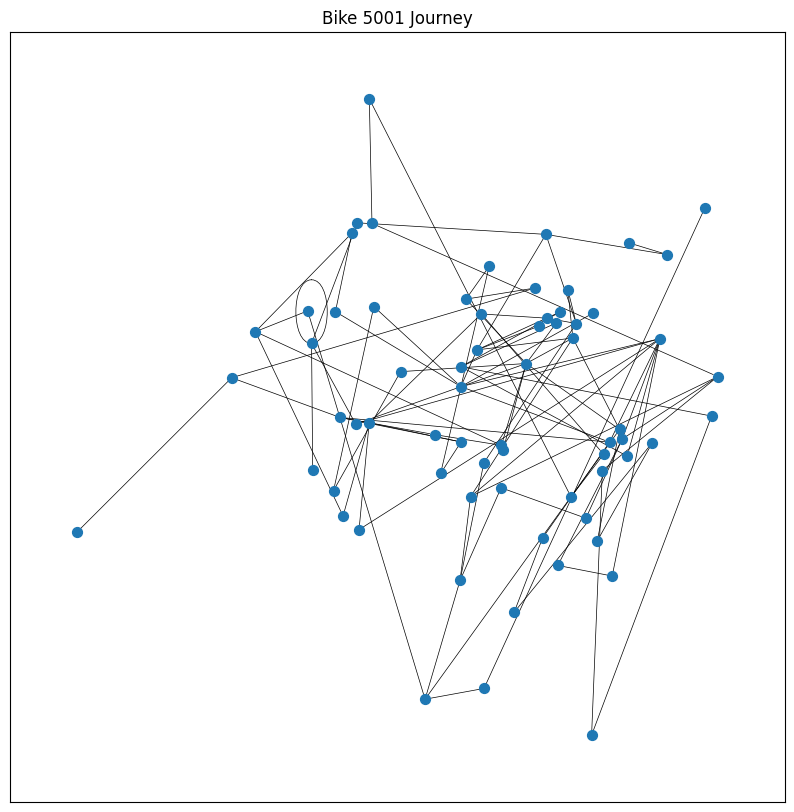

In [69]:
bike5001_network = pd.read_sql("SELECT * FROM bike_5001 ORDER BY starttime LIMIT 100", con)


'''
G = nx.from_pandas_edgelist(question8, 'start_station_name', 'end_station_name', create_using=nx.Graph())  # undirected, unweighted graph
# Create figure
plt.figure(figsize=(15,15), dpi=100)
plt.title("Bike 5001 Journey.")
nx.draw_networkx(G, labels="", node_size=5) #node_color=node_colors, labels=nx_labels, node_size=50, font_size=15)
plt.show()

'''

G = nx.Graph()

#for row in bike5001_network.itertuples(index=False):
for index, row in bike5001_network.iterrows():
  ###G.add_node(row.start_station_name, pos=(row.start_station_longitude, row.start_station_latitude))
  # Add the nodes to the graph
  G.add_node(row.start_station_name, pos=(row.start_station_longitude, row.start_station_latitude))
  G.add_node(row.end_station_name, pos=(row.end_station_longitude, row.end_station_latitude))

  # Add the edge between start_station and end_station
  G.add_edge(row.start_station_name, row.end_station_name)


# Extract the node positions from the graph
node_positions = {node: node_data['pos'] for node, node_data in G.nodes(data=True)}

# Draw the graph
plt.figure(figsize=(10,10), dpi=100)
plt.title("Bike 5001 Journey")


# Change node colors to differentiate genes and diseases
edge_colors = range(100)

nx.draw_networkx(G, pos=node_positions, with_labels=False, arrows=True, node_size=50,
                 width=0.5, font_size=8)#,
                 #edge_cmap = plt.cm.Blues,
                 #edge_color = edge_colors)


plt.show()





#nx.draw(G, nx.get_node_attributes(G, 'pos'),
#        with_labels=False,
#        node_size=20,
#        node_color=range(274),
#        cmap=plt.cm.Blues)


#G2 = nx.from_pandas_edgelist(bike5001_network, 'start_station_name', 'end_station_name', create_using=nx.Graph())
#nx.draw_networkx(G2, labels="", node_size=5) #node_color=node_colors, labels=nx_labels, node_size=50, font_size=15)

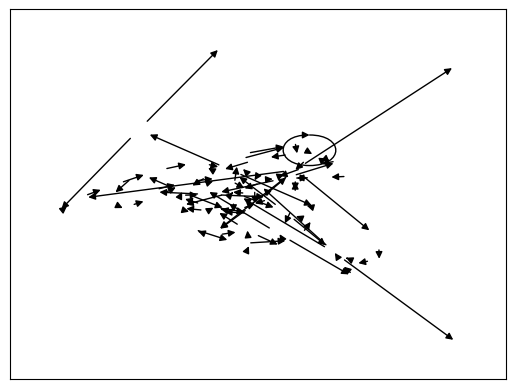

In [23]:
G = nx.DiGraph()

#G.add_edges_from([(1, 2), (1, 3), (2, 3)])

for index, row in bike5001_network.iterrows():
  # Add the edge between start_station and end_station
  G.add_edge(row.start_station_name, row.end_station_name)


arcs = nx.draw_networkx_edges(G, pos=nx.spring_layout(G))

8 stations impacts by 9 inch sea level rise 10 percent storm!
23 stations impacts by 21 inch sea level rise 10 percent storm!
54 stations impacts by 36 inch sea level rise 10 percent storm!


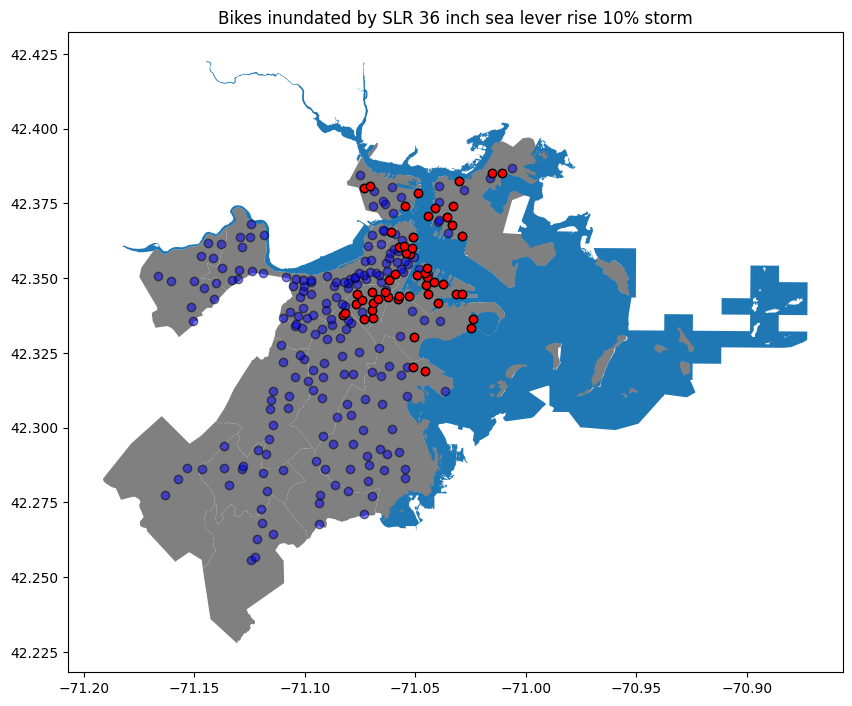

In [147]:
# SEA LEVEL RISE MAPPING AND DATA

# Filter crash data to just bikes
stations = pd.read_sql("SELECT * FROM current_bluebikes_stations", con)

# Mapping a dataframe with lat/long data to a point file
points = [Point(xy) for xy in zip(stations['Longitude'], stations['Latitude'])]
# Convert that point layer into a geodataframe object
stations = gpd.GeoDataFrame(stations, crs="EPSG:4326", geometry=points)



# Add shapefile of Boston Neighborhoods https://data.boston.gov/dataset/boston-neighborhoods
boston_neighborhoods = gpd.read_file(boston_city_shp, type='Polygon')
boston_neighborhoods = boston_neighborhoods.to_crs('EPSG:4326')




# Add 9 inch level rise 10 pct storm
sea_level_9in = gpd.read_file(sea_level_9in_path, type='Polygon')
sea_level_9in = sea_level_9in.to_crs('EPSG:4326')
# Add 21 inch level rise 10 pct storm
sea_level_21in = gpd.read_file(sea_level_21in_path, type='Polygon')
sea_level_21in = sea_level_21in.to_crs('EPSG:4326')
# Add 36 inch level rise 10 pct storm
sea_level_36in = gpd.read_file(sea_level_36in_path, type='Polygon')
sea_level_36in = sea_level_36in.to_crs('EPSG:4326')




clipped_stations = gpd.clip(stations, boston_neighborhoods, keep_geom_type=False)
# Spatially clip the points to the polygons
clipped_stations_SLR9 = gpd.clip(clipped_stations, sea_level_9in, keep_geom_type=False)
clipped_stations_SLR21 = gpd.clip(clipped_stations, sea_level_21in, keep_geom_type=False)
clipped_stations_SLR36 = gpd.clip(clipped_stations, sea_level_36in, keep_geom_type=False)

# number of stations underwater!
print(clipped_stations_SLR9.count()[0], "stations impacts by 9 inch sea level rise 10 percent storm!")
print(clipped_stations_SLR21.count()[0], "stations impacts by 21 inch sea level rise 10 percent storm!")
print(clipped_stations_SLR36.count()[0], "stations impacts by 36 inch sea level rise 10 percent storm!")




# create figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
# Neighborhood background map
#nhoods.plot(color='#808080', edgecolor='#000000', ax=ax)  # background plot

# Plot background images
#bike_lanes.plot(ax=ax)
boston_neighborhoods.plot(ax=ax, color='grey', zorder=1)
sea_level_9in.plot(ax=ax, zorder=2)

# Plot data
clipped_stations.plot(edgecolor='#000000', legend=True, categorical=False, ax=ax, color='b', alpha=0.5, zorder=4)
clipped_stations_SLR36.plot(edgecolor='#000000', legend=True, categorical=False, ax=ax, color='r', zorder=4)
plt.title("Statins in Boston inundated by SLR 36 inch sea lever rise 10% storm")
plt.show()


Note to self: Sea level rise next step includes joining inundated stations to the full table, and then getting the number of trips generated from these stations. 

Then, compare the number of trips generated from these stations to the total number of trips taken.

## Alex's Work In Progress Stuff

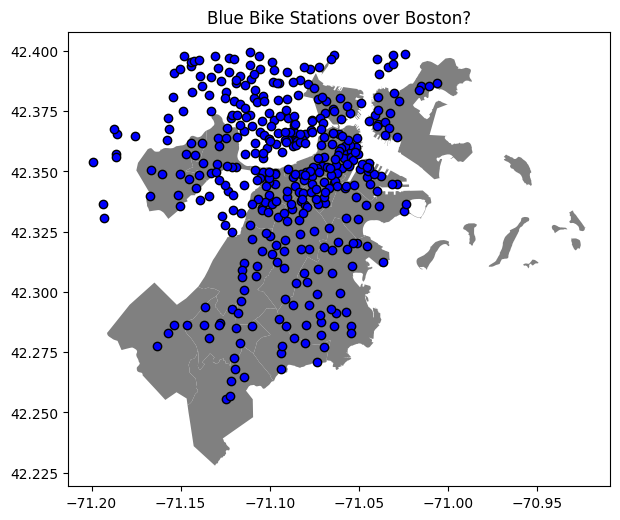

In [78]:
# Filter crash data to just bikes
stations = pd.read_sql("SELECT * FROM current_bluebikes_stations", con)

# make sure our data is within city limits
stations = stations[stations.Latitude >= 42.20]
stations = stations[stations.Latitude <= 42.40]

stations = stations[stations.Longitude >= -71.2]
stations = stations[stations.Longitude <= -70.95]

# Mapping a dataframe with lat/long data to a point file
points = [Point(xy) for xy in zip(stations['Longitude'], stations['Latitude'])]
# Convert that point layer into a geodataframe object
stations = gpd.GeoDataFrame(stations, crs="EPSG:4326", geometry=points)


# Add shapefile of Boston Neighborhoods https://data.boston.gov/dataset/boston-neighborhoods
boston_neighborhoods = gpd.read_file(boston_city_shp, type='Polygon')
boston_neighborhoods = boston_neighborhoods.to_crs('EPSG:4326')


# create figure
fig, ax = plt.subplots(figsize=(7, 7))
# Neighborhood background map
#nhoods.plot(color='#808080', edgecolor='#000000', ax=ax)  # background plot

# Plot background images
#bike_lanes.plot(ax=ax)
boston_neighborhoods.plot(ax=ax, color='grey')

# Plot data
stations.plot(edgecolor='#000000', legend=True, categorical=False, ax=ax, color='b')
plt.title("Blue Bike Stations over Boston?")
plt.show()


## How can we restrict points to just plot over the polygon (city of boston)
########### From Zack - try this (move to proper place in code and map this instead of 'stations')############
clipped_stations = gpd.clip(stations, boston_neighborhoods, keep_geom_type=False)
